In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

######## Ref : https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [2]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

In [3]:
#DLI5179/PA1/t10k-images.idx3-ubyte
# Set file paths based on added MNIST Datasets
#
input_path = '/home/koushik/Documents/DLI_EE5179/DLI5179/PA1/'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

        

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
np.sum(counts)

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


60000

In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

np.sum(counts)


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


10000

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
m_train = x_train.shape[0]
m_test =  x_test.shape[0]
num_px = x_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
Height/Width of each image: num_px = 28
Each image is of size: (28, 28, 3)
train_set_x shape: (60000, 28, 28)
train_set_y shape: (60000,)
test_set_x shape: (10000, 28, 28)
test_set_y shape: (10000,)


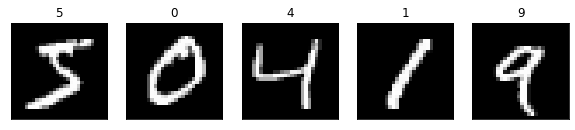

In [26]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [35]:
# Convert y_train into one-hot format
from keras.utils import to_categorical
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

2022-08-18 19:15:07.819340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-18 19:15:07.819372: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [38]:
# Reshape the training and test examples

train_set_x_flatten = x_train.reshape(x_train.shape[0], -1)
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1)


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))

train_set_x_flatten shape: (60000, 784)
test_set_x_flatten shape: (10000, 784)


In [39]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [76]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(z)/sum(np.exp(x))

def compute_z(W, X, b):
    return np.dot(W, X) + b

def compute_activation(z, activation):
    if(activation == "sigmoid"):
        return sigmoid(z)
    elif(activation == "relu"):
        return relu(z)
    elif(activation == "softmax"):
        return softmax(z)

In [77]:
def grad_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

def grad_relu(x):
    return x>0

In [69]:
def init_weights(ni,nh):  # Glorot uniform
  nin = ni; nout = nh
  sd = np.sqrt(6.0 / (nin + nout))
  #print(sd)
  W = []
  for i in range(ni):
    for j in range(nh):
      x = np.float32(np.random.uniform(-sd, sd))
      print(x)
      W.append(x)
  return W
      

In [74]:
#I/P → h 1 (500) → h 2 (250) → h 3 (100) → O/P

In [73]:
def initialize_parameters(n_x, n_h1,n_h2,n_h3, n_y):
    W1 = init_weights(n_h1, n_x)
    W2 = init_weights(n_h2, n_h1)
    W3 = init_weights(n_h3, n_h2)
    W4 = init_weights(n_y, n_h3)
    b1 = np.zeros((n_h1, 1))
    b2 = np.zeros((n_h2, 1))
    b3 = np.zeros((n_h3, 1))
    b4 = np.zeros((n_y, 1))
    return W1, W2, W3, W4 ,b1, b2, b3 ,b4